In [3]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

# Finding qubits with spectroscopy

We can check all the qubit frequencies for each backend at https://quantum-computing.ibm.com/services?services=systems. 
Therefore we first choose the backend for experiment and decide what number of qubit to see. Then we will sweep the frequency around the known qubit frequency to see the resonance at the qubit frequency reported by the backend.

In [4]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_belem')

ibmqfactory.load_account:WARNING:2021-09-28 07:00:09,540: Credentials are already in use. The existing account in the session will be replaced.


In [34]:
qubit = []

In [29]:
from qiskit_experiments.library.characterization.qubit_spectroscopy import QubitSpectroscopy
from qiskit import schedule

In [7]:
freq_Q0_estimate = backend.defaults().qubit_freq_est[0]
frequencies = np.linspace(freq_Q0_estimate -15e6, freq_Q0_estimate + 15e6, 51)
spec_Q0 = QubitSpectroscopy(0, frequencies)
spec_Q0.set_experiment_options(amp=0.1) #options

Spectroscopy sets one pulse schedule per one frequency in frequency sweep range. It drives the channel of qubit you want to probe with a GaussianSquare pulse which is embedded in a spectroscopy gate and measure the qubit.
This whole spectroscopy process produce a circuit and this can be verified by the cell below.
A list of circuits is generated, each performing spectroscopy gate with a different frequency.

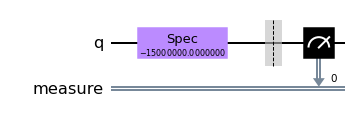

In [9]:
circuit_Q0 = spec_Q0.circuits(backend)[0]
circuit_Q0.draw(output="mpl")

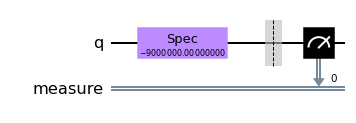

In [10]:
circuit_Q0 = spec_Q0.circuits(backend)[10]
circuit_Q0.draw(output="mpl")

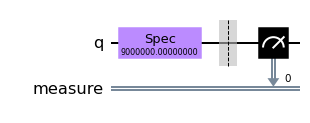

In [13]:
circuit_Q0 = spec_Q0.circuits(backend)[40]
circuit_Q0.draw(output="mpl")

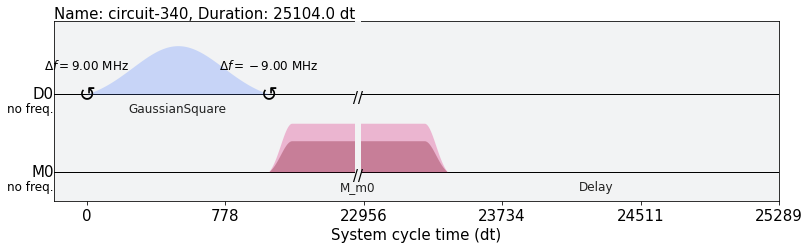

In [28]:
schedule(circuit_Q0, backend).draw()

In [16]:
spec_Q0_data = spec_Q0.run(backend)

You should wait for the result back from the backend.

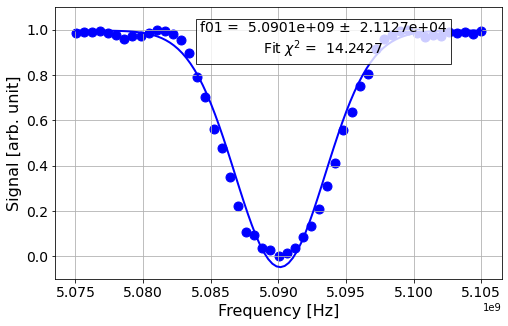

In [19]:
spec_Q0_data.figure(0)

In [30]:
print(spec_Q0_data.analysis_results("f01"))

DbAnalysisResultV1
- name: f01
- value: 5090131451.638256 ± 21126.623275520193 Hz
- χ²: 14.242725364627493
- quality: bad
- device_components: ['Q0']
- verified: False


In [21]:
freqQ1_estimate = backend.defaults().qubit_freq_est[1]
frequencies = np.linspace(freqQ1_estimate -15e6, freqQ1_estimate + 15e6, 51)
spec_Q1 = QubitSpectroscopy(1, frequencies)
spec_Q1.set_experiment_options(amp=0.1)

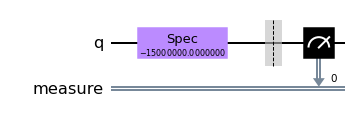

In [22]:
circuit_Q1 = spec_Q1.circuits(backend)[0]
circuit_Q1.draw(output="mpl")

In [23]:
spec_Q1_data = spec_Q1.run(backend)

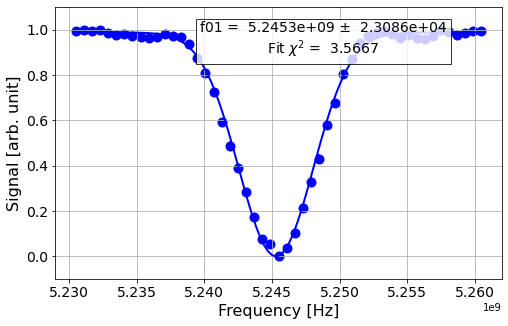

In [24]:
spec_Q1_data.figure(0)

In [31]:
print(spec_Q1_data.analysis_results("f01"))

DbAnalysisResultV1
- name: f01
- value: 5245303494.451371 ± 23085.764876683992 Hz
- χ²: 3.5667146969471584
- quality: bad
- device_components: ['Q1']
- verified: False


# Custom Options

In [42]:
freq_Q0_estimate = backend.defaults().qubit_freq_est[0]
frequencies = np.linspace(freq_Q0_estimate -15e6, freq_Q0_estimate + 15e6, 51)
spec_Q0 = QubitSpectroscopy(0, frequencies)
spec_Q0.set_experiment_options(width=1000)

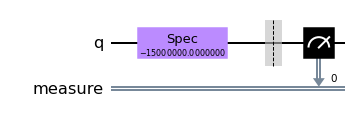

In [43]:
circuit_Q0 = spec_Q0.circuits(backend)[0]
circuit_Q0.draw(output="mpl")

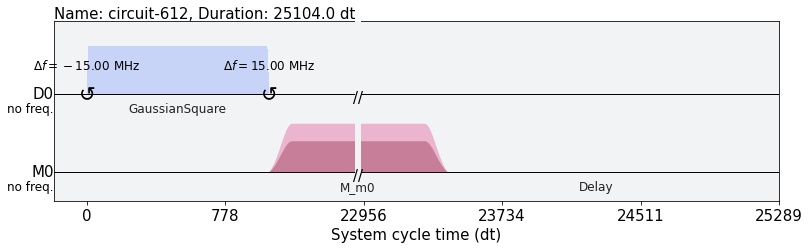

In [44]:
schedule(circuit_Q0, backend).draw()